In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


# Step 1: Load and Preprocess Data

with open('Bakery.csv', 'r') as file:
    transactions = [line.strip().split(',') for line in file if line.strip()]

# Transform transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
# Step 2: Apply Apriori Algorithm

# Find frequent itemsets with a minimum support of 30% (0.3)
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support              itemsets
0  0.564121           (Afternoon)
1  0.409791             (Morning)
2  0.624488             (Weekday)
3  0.375463             (Weekend)
4  0.354642  (Afternoon, Weekday)


In [22]:
# Step 3: Generate Association Rules

# Generate rules with a minimum confidence of 50% (0.5)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# (Optional) Further filter rules to ensure support is also at least 30%
rules = rules[rules['support'] >= 0.3]

print("\nAssociation Rules (Support, Confidence, Lift):")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Association Rules (Support, Confidence, Lift):
   antecedents  consequents   support  confidence      lift
0  (Afternoon)    (Weekday)  0.354642    0.628663  1.006685
1    (Weekday)  (Afternoon)  0.354642    0.567893  1.006685


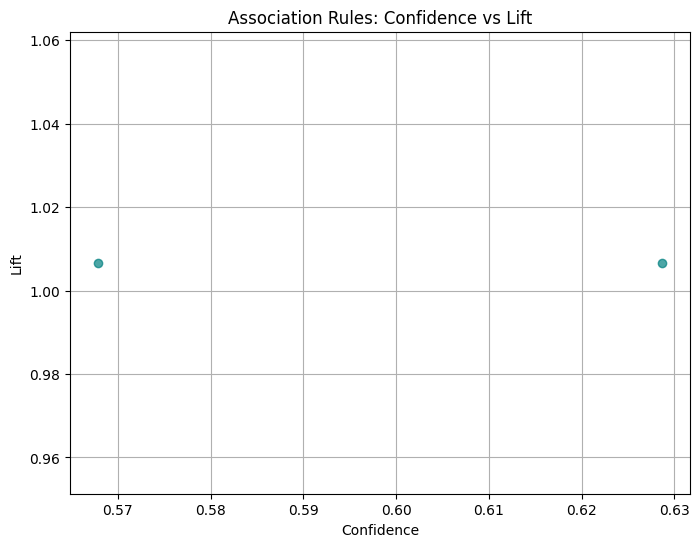

In [23]:
# Step 4: Visualize the Association Rules

plt.figure(figsize=(8, 6))
plt.scatter(rules['confidence'], rules['lift'], alpha=0.7, color='teal')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules: Confidence vs Lift')
plt.grid(True)
plt.show()